<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Ago25-26/TareaAgo25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-5c799f208988>:64: RankWarning: Polyfit may be poorly conditioned
  val_costs = [cross_validation(xi, yi, degree) for degree in degrees]
<ipython-input-5-5c799f208988>:64: RankWarning: Polyfit may be poorly conditioned
  val_costs = [cross_validation(xi, yi, degree) for degree in degrees]
<ipython-input-5-5c799f208988>:64: RankWarning: Polyfit may be poorly conditioned
  val_costs = [cross_validation(xi, yi, degree) for degree in degrees]
<ipython-input-5-5c799f208988>:64: RankWarning: Polyfit may be poorly conditioned
  val_costs = [cross_validation(xi, yi, degree) for degree in degrees]
<ipython-input-5-5c799f208988>:64: RankWarning: Polyfit may be poorly conditioned
  val_costs = [cross_validation(xi, yi, degree) for degree in degrees]
<ipython-input-5-5c799f208988>:64: RankWarning: Polyfit may be poorly conditioned
  val_costs = [cross_validation(xi, yi, degree) for degree in degrees]
<ipython-input-5-5c799f208988>:64: RankWarning: Polyfit may be poorly conditioned


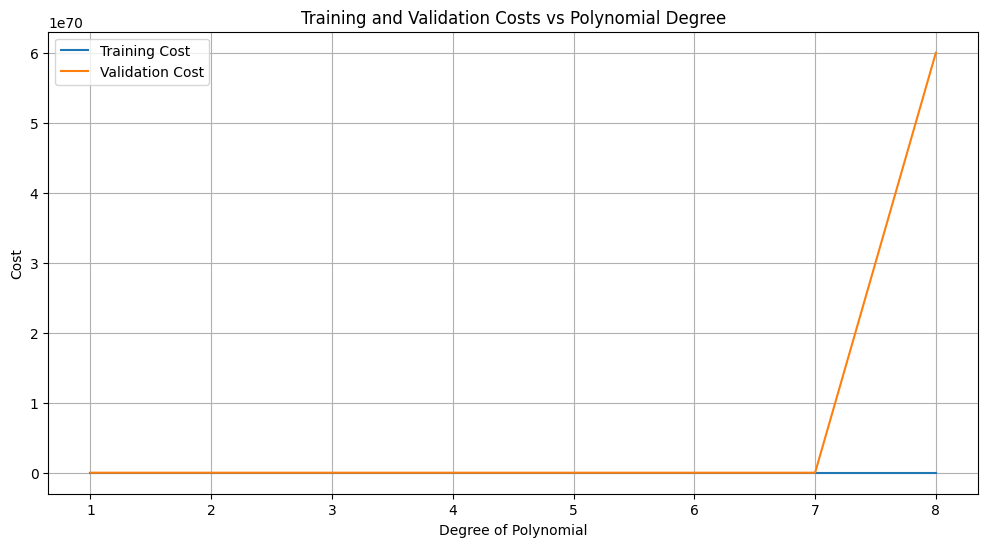

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar los pesos y calcular el costo en el conjunto de entrenamiento
def train_polynomial_model(x, y, degree):
    # Crear una matriz de características con potencias de x según el grado
    X_train = np.vstack([x**i for i in range(degree + 1)]).T

    # Calcular los pesos usando la fórmula de regresión polinomial
    weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

    # Calcular las predicciones del modelo
    predictions = X_train @ weights

    # Calcular el costo utilizando el error cuadrado medio
    cost = np.mean((predictions - y)**2)

    return cost

# Función para calcular el costo en el conjunto de validación
def validate_polynomial_model(x, y, weights):
    degree = len(weights) - 1
    X_val = np.vstack([x**i for i in range(degree + 1)]).T
    predictions = X_val @ weights
    cost = np.mean((predictions - y)**2)
    return cost

# Función para calcular el costo de cross-validación con K=N
def cross_validation(x, y, degree, num_folds=5):
    fold_size = len(x) // num_folds
    total_cost = 0

    for i in range(num_folds):
        start_idx = i * fold_size
        end_idx = start_idx + fold_size

        x_train = np.concatenate((x[:start_idx], x[end_idx:]))
        y_train = np.concatenate((y[:start_idx], y[end_idx:]))

        x_val = x[start_idx:end_idx]
        y_val = y[start_idx:end_idx]

        weights = np.polyfit(x_train, y_train, degree)
        cost = validate_polynomial_model(x_val, y_val, weights)
        total_cost += cost

    return total_cost / num_folds


"""Si usamos loadtxt() sin .T, lee en filas no en columnas"""


data = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T

xi = np.array(data[0])
yi = np.array(data[1])

# Configurar grados de polinomio
max_degree = 8
degrees = np.arange(1, max_degree + 1)

# Calcular costos en el conjunto de entrenamiento y validación
train_costs = [train_polynomial_model(xi, yi, degree) for degree in degrees]
val_costs = [cross_validation(xi, yi, degree) for degree in degrees]

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_costs, label='Training Cost')
plt.plot(degrees, val_costs, label='Validation Cost')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Cost')
plt.title('Training and Validation Costs vs Polynomial Degree')
plt.legend()
plt.xticks(degrees)
plt.grid(True)
plt.show()